In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('credit_score.csv')
df= df.drop(columns= ['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'])
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 22)

In [4]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [6]:
df.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
df['Age']= df['Age'].str.replace('_', '')
df['Age']= df['Age'].astype(int)
df['Occupation']= df['Occupation'].replace('_______', np.nan)
df['Annual_Income']= df['Annual_Income'].str.replace('_', '')
df['Annual_Income']= df['Annual_Income'].astype(float)
df['Num_of_Loan']= df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan']= df['Num_of_Loan'].astype(int)

In [9]:
df['Num_of_Delayed_Payment'].fillna(0, inplace= True)

In [10]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].astype(float)
df['Credit_Score']= df['Credit_Score'].replace(['Poor', 'Standard', 'Good'], [0,1,2])
df['Monthly_Balance']= df['Monthly_Balance'].str.replace('_', '')
df['Monthly_Balance']= df['Monthly_Balance'].astype(float)
df['Payment_Behaviour']= df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Amount_invested_monthly']= df['Amount_invested_monthly'].str.replace('_', '')
df['Amount_invested_monthly']= df['Amount_invested_monthly'].astype(float)

In [11]:
df['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [12]:
df['Payment_of_Min_Amount']= df['Payment_of_Min_Amount'].replace('NM', 'No')
df['Payment_of_Min_Amount']= df['Payment_of_Min_Amount'].replace(['Yes', 'No'], [1,0])
df['Outstanding_Debt']= df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt']= df['Outstanding_Debt'].astype(float)
df['Credit_Mix']= df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix']= df['Credit_Mix'].replace(['Bad', 'Standard', 'Good'], [0,1,2])
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].replace('_', np.nan)
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [14]:
df.isna().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [15]:
df.fillna(method= 'ffill', inplace= True)
df.fillna(method= 'bfill', inplace= True)
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

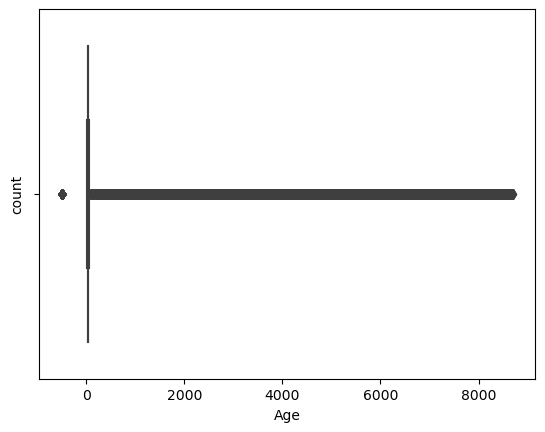

In [16]:
sns.boxplot(x= df['Age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
# removing outliers from age column since all other column values are relevant

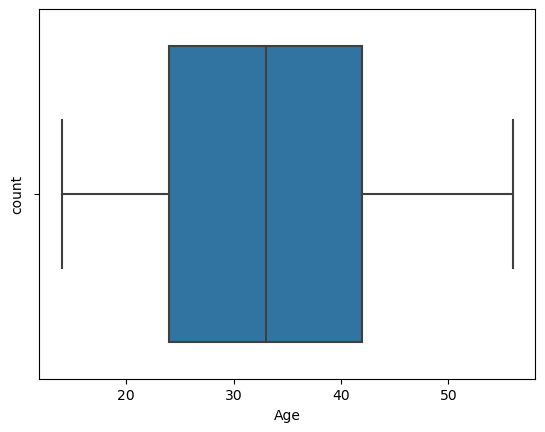

In [17]:
q1= df['Age'].quantile(0.25)
q3= df['Age'].quantile(0.75)
iqr= q3-q1
df= df[(df.Age>= q1- 1.5*iqr) & (df.Age<= q3+1.5*iqr)]
sns.boxplot(x= df['Age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Month']= le.fit_transform(df['Month'])
df['Occupation']= le.fit_transform(df['Occupation'])
df['Payment_Behaviour']= le.fit_transform(df['Payment_Behaviour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97219 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     97219 non-null  int32  
 1   Age                       97219 non-null  int32  
 2   Occupation                97219 non-null  int32  
 3   Annual_Income             97219 non-null  float64
 4   Monthly_Inhand_Salary     97219 non-null  float64
 5   Num_Bank_Accounts         97219 non-null  int64  
 6   Num_Credit_Card           97219 non-null  int64  
 7   Interest_Rate             97219 non-null  int64  
 8   Num_of_Loan               97219 non-null  int32  
 9   Delay_from_due_date       97219 non-null  int64  
 10  Num_of_Delayed_Payment    97219 non-null  float64
 11  Changed_Credit_Limit      97219 non-null  float64
 12  Num_Credit_Inquiries      97219 non-null  float64
 13  Credit_Mix                97219 non-null  float64
 14  Outsta

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list= []
for col in df.columns:
    if ((df[col].dtype!= 'object') & (col != 'Credit_Score')):
        col_list.append(col)

In [20]:
x= df[col_list]
vif_data= pd.DataFrame()
vif_data['Features']= x.columns
vif_data['VIF']= [variance_inflation_factor(x.values, j) for j in range(len(x.columns))]
print(vif_data)

                    Features       VIF
0                      Month  0.299876
1                        Age  0.094595
2                 Occupation  0.277718
3              Annual_Income  0.984992
4      Monthly_Inhand_Salary  0.365741
5          Num_Bank_Accounts  0.979257
6            Num_Credit_Card  0.970542
7              Interest_Rate  0.976433
8                Num_of_Loan  0.997749
9        Delay_from_due_date  0.331933
10    Num_of_Delayed_Payment  0.981687
11      Changed_Credit_Limit  0.299343
12      Num_Credit_Inquiries  0.979734
13                Credit_Mix  0.321550
14          Outstanding_Debt  0.396238
15  Credit_Utilization_Ratio  0.024515
16     Payment_of_Min_Amount  0.476357
17       Total_EMI_per_month  0.972340
18   Amount_invested_monthly  0.911368
19         Payment_Behaviour  0.310328
20           Monthly_Balance  1.000212


In [22]:
x= df.drop(['Credit_Score'], axis= 1)
y= df['Credit_Score']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=6)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)

y_pred= lr.predict(x_test)

from sklearn.metrics import *
accuracy_score(y_test, y_pred)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
26663,1,1
38751,1,2
19569,1,1
97995,1,2
2551,2,2
...,...,...
66549,2,2
2898,0,1
591,1,0
55215,0,0


In [23]:
accuracy_score(y_test, y_pred)

0.6215799218267846

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
26663,1,1
38751,1,2
19569,1,1
97995,1,0
2551,2,2
...,...,...
66549,2,2
2898,0,1
591,1,1
55215,0,0


In [28]:
accuracy_score(y_test, y_pred)

0.69178152643489

In [30]:
from sklearn.model_selection import GridSearchCV
parameters= {'max_features': ['log2', 'sqrt', 'auto'],
            'criterion': ['entropy', 'gini'],
            'max_depth': [2,3,5,10,50],
            'min_samples_split': [2,3,50,100],
            'min_samples_leaf': [1,5,8,10]}

grid_obj= GridSearchCV(dt, parameters)
grid_obj= grid_obj.fit(x_train, y_train)
dt= grid_obj.best_estimator_
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
acc_dt= round(accuracy_score(y_test, y_pred)*100, 2)
print(f'Accruracy of Decision Tree Model : {acc_dt}')

Accruracy of Decision Tree Model : 71.32


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7967496399917713